# **Challenge TelecomX - Predicción De Cancelación**
## 🎯 **Misión**

La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  
La empresa TelecomX quiere anticiparse al problema de la cancelación, por lo que se pretende construir un pipeline robusto para esta etapa inicial de modelado.

## 🧠 **Objetivos del Desafío**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **Preparacion de los datos**

### **Extracción**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

# Importando los datos
datos = pd.read_csv('DataBase/TelecomXData.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.daily,account.Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,2.186667,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,1.996667,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,2.463333,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,3.266667,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,2.796667,267.40


In [27]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   int64  
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   objec

### **Eliminación de Columnas Irrelevantes**

In [28]:
# Eliminamos el identificadoe ID del cliente ya que no nos da información sobre si es probable que deje el servicio.
# Eliminamos el cargo diario, pues proviene del cargo mensual, ademas de que el este cargo mensual tiene menos decimales. Con esto reducimo el riesgo de errores futuros en el modelo.
datos = datos.drop(columns = ['customerID','account.Charges.daily'])

In [29]:
datos.sample(10)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
3468,0,Female,0,0,0,10,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.30,185.20
4970,0,Male,1,0,0,51,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),25.00,1260.70
6679,0,Male,0,0,0,44,1,No,DSL,Yes,No,No,Yes,Yes,No,One year,0,Electronic check,65.40,2774.55
6119,0,Male,0,0,0,4,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,56.75,245.15
1220,0,Female,0,1,0,34,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Electronic check,24.70,780.20
4990,0,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50
2278,0,Male,0,1,0,70,0,No phone service,DSL,No,Yes,Yes,Yes,No,Yes,One year,1,Bank transfer (automatic),51.05,3635.15
3284,1,Female,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,19.60,19.60
3763,0,Female,0,0,0,47,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Mailed check,20.55,945.70
2253,0,Male,0,1,0,60,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),20.50,1198.80


### **Transformando las columnas binarias** 

In [30]:
datos['customer.gender'] = datos['customer.gender'].map({'Male': 1, 'Female': 0})
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,0,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,1,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,1,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,1,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,0,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   int64  
 1   customer.gender            7256 non-null   int64  
 2   customer.SeniorCitizen     7256 non-null   int64  
 3   customer.Partner           7256 non-null   int64  
 4   customer.Dependents        7256 non-null   int64  
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   int64  
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  internet.StreamingTV       7256 non-null   objec

### **Encoding**

In [32]:
categoricas = [
    'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']
pd.get_dummies(data=datos,columns=categoricas, dtype=int).head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [33]:
datos_codificados = pd.get_dummies(data=datos,columns=categoricas, dtype=int)
datos_codificados.sample(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
2491,0,0,0,0,0,36,1,0,19.55,620.75,...,0,1,0,0,1,0,0,0,0,1
4204,0,0,1,0,0,52,1,0,59.85,3103.25,...,1,0,0,0,0,1,1,0,0,0
6514,0,1,0,0,0,18,1,0,19.65,411.25,...,0,1,0,0,1,0,0,0,0,1
4069,0,0,0,1,1,58,1,0,99.25,5846.65,...,0,0,1,0,1,0,0,1,0,0
69,0,0,0,1,0,71,0,0,58.25,4145.90,...,0,0,1,0,0,1,1,0,0,0


In [34]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7256 non-null   int64  
 1   customer.gender                                  7256 non-null   int64  
 2   customer.SeniorCitizen                           7256 non-null   int64  
 3   customer.Partner                                 7256 non-null   int64  
 4   customer.Dependents                              7256 non-null   int64  
 5   customer.tenure                                  7256 non-null   int64  
 6   phone.PhoneService                               7256 non-null   int64  
 7   account.PaperlessBilling                         7256 non-null   int64  
 8   account.Charges.Monthly                          7256 non-null   float64
 9   account.Charges.Total         

## **Correlación**

### **Matriz de correlación**

In [35]:
corr = datos_codificados.corr()
corr

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
Churn,1.000000,-0.009494,0.146400,-0.148106,-0.160347,-0.345799,0.012337,0.186309,0.189393,-0.194440,...,0.128793,-0.223755,0.060092,0.395067,-0.174340,-0.294467,-0.114953,-0.131448,0.294181,-0.089198
customer.gender,-0.009494,1.000000,-0.004239,-0.004593,0.011884,0.005936,-0.006065,-0.011417,-0.013126,0.000488,...,0.007785,0.005082,-0.012109,-0.001181,0.007063,-0.005361,-0.018316,0.001102,0.002149,0.014537
customer.SeniorCitizen,0.146400,-0.004239,1.000000,0.023439,-0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,...,0.035218,-0.182481,0.119049,0.136278,-0.047054,-0.114058,-0.015819,-0.022914,0.170320,-0.153742
customer.Partner,-0.148106,-0.004593,0.023439,1.000000,0.448500,0.379684,0.019496,-0.010303,0.098064,0.316918,...,-0.115649,-0.000448,0.116399,-0.277182,0.081293,0.245737,0.109764,0.081899,-0.079001,-0.099416
customer.Dependents,-0.160347,0.011884,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.110541,-0.114345,0.063960,...,-0.080119,0.140906,-0.038832,-0.228649,0.069582,0.200304,0.051254,0.062449,-0.150424,0.057690
customer.tenure,-0.345799,0.005936,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,...,-0.255267,-0.035545,0.286157,-0.650810,0.205752,0.562783,0.241031,0.235126,-0.208832,-0.232690
phone.PhoneService,0.012337,-0.006065,0.009885,0.019496,-0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,...,-0.110928,0.172730,-0.034847,-0.002686,-0.001727,0.004780,0.008099,-0.009893,0.004488,-0.003330
account.PaperlessBilling,0.186309,-0.011417,0.157470,-0.010303,-0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,...,0.061656,-0.324073,0.212314,0.167119,-0.051231,-0.146044,-0.018482,-0.011833,0.208592,-0.205076
account.Charges.Monthly,0.189393,-0.013126,0.220098,0.098064,-0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,...,0.017803,-0.763420,0.627997,0.058554,0.008672,-0.076567,0.038141,0.031132,0.275064,-0.377800
account.Charges.Total,-0.194440,0.000488,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,...,-0.203664,-0.374618,0.521245,-0.447152,0.175040,0.354547,0.180882,0.184990,-0.057178,-0.295076


### **Mapa de calor de la correlación**

PAra mostrar de una manera mas entendible la matris de correlación se crea un mapa de calor con los datos

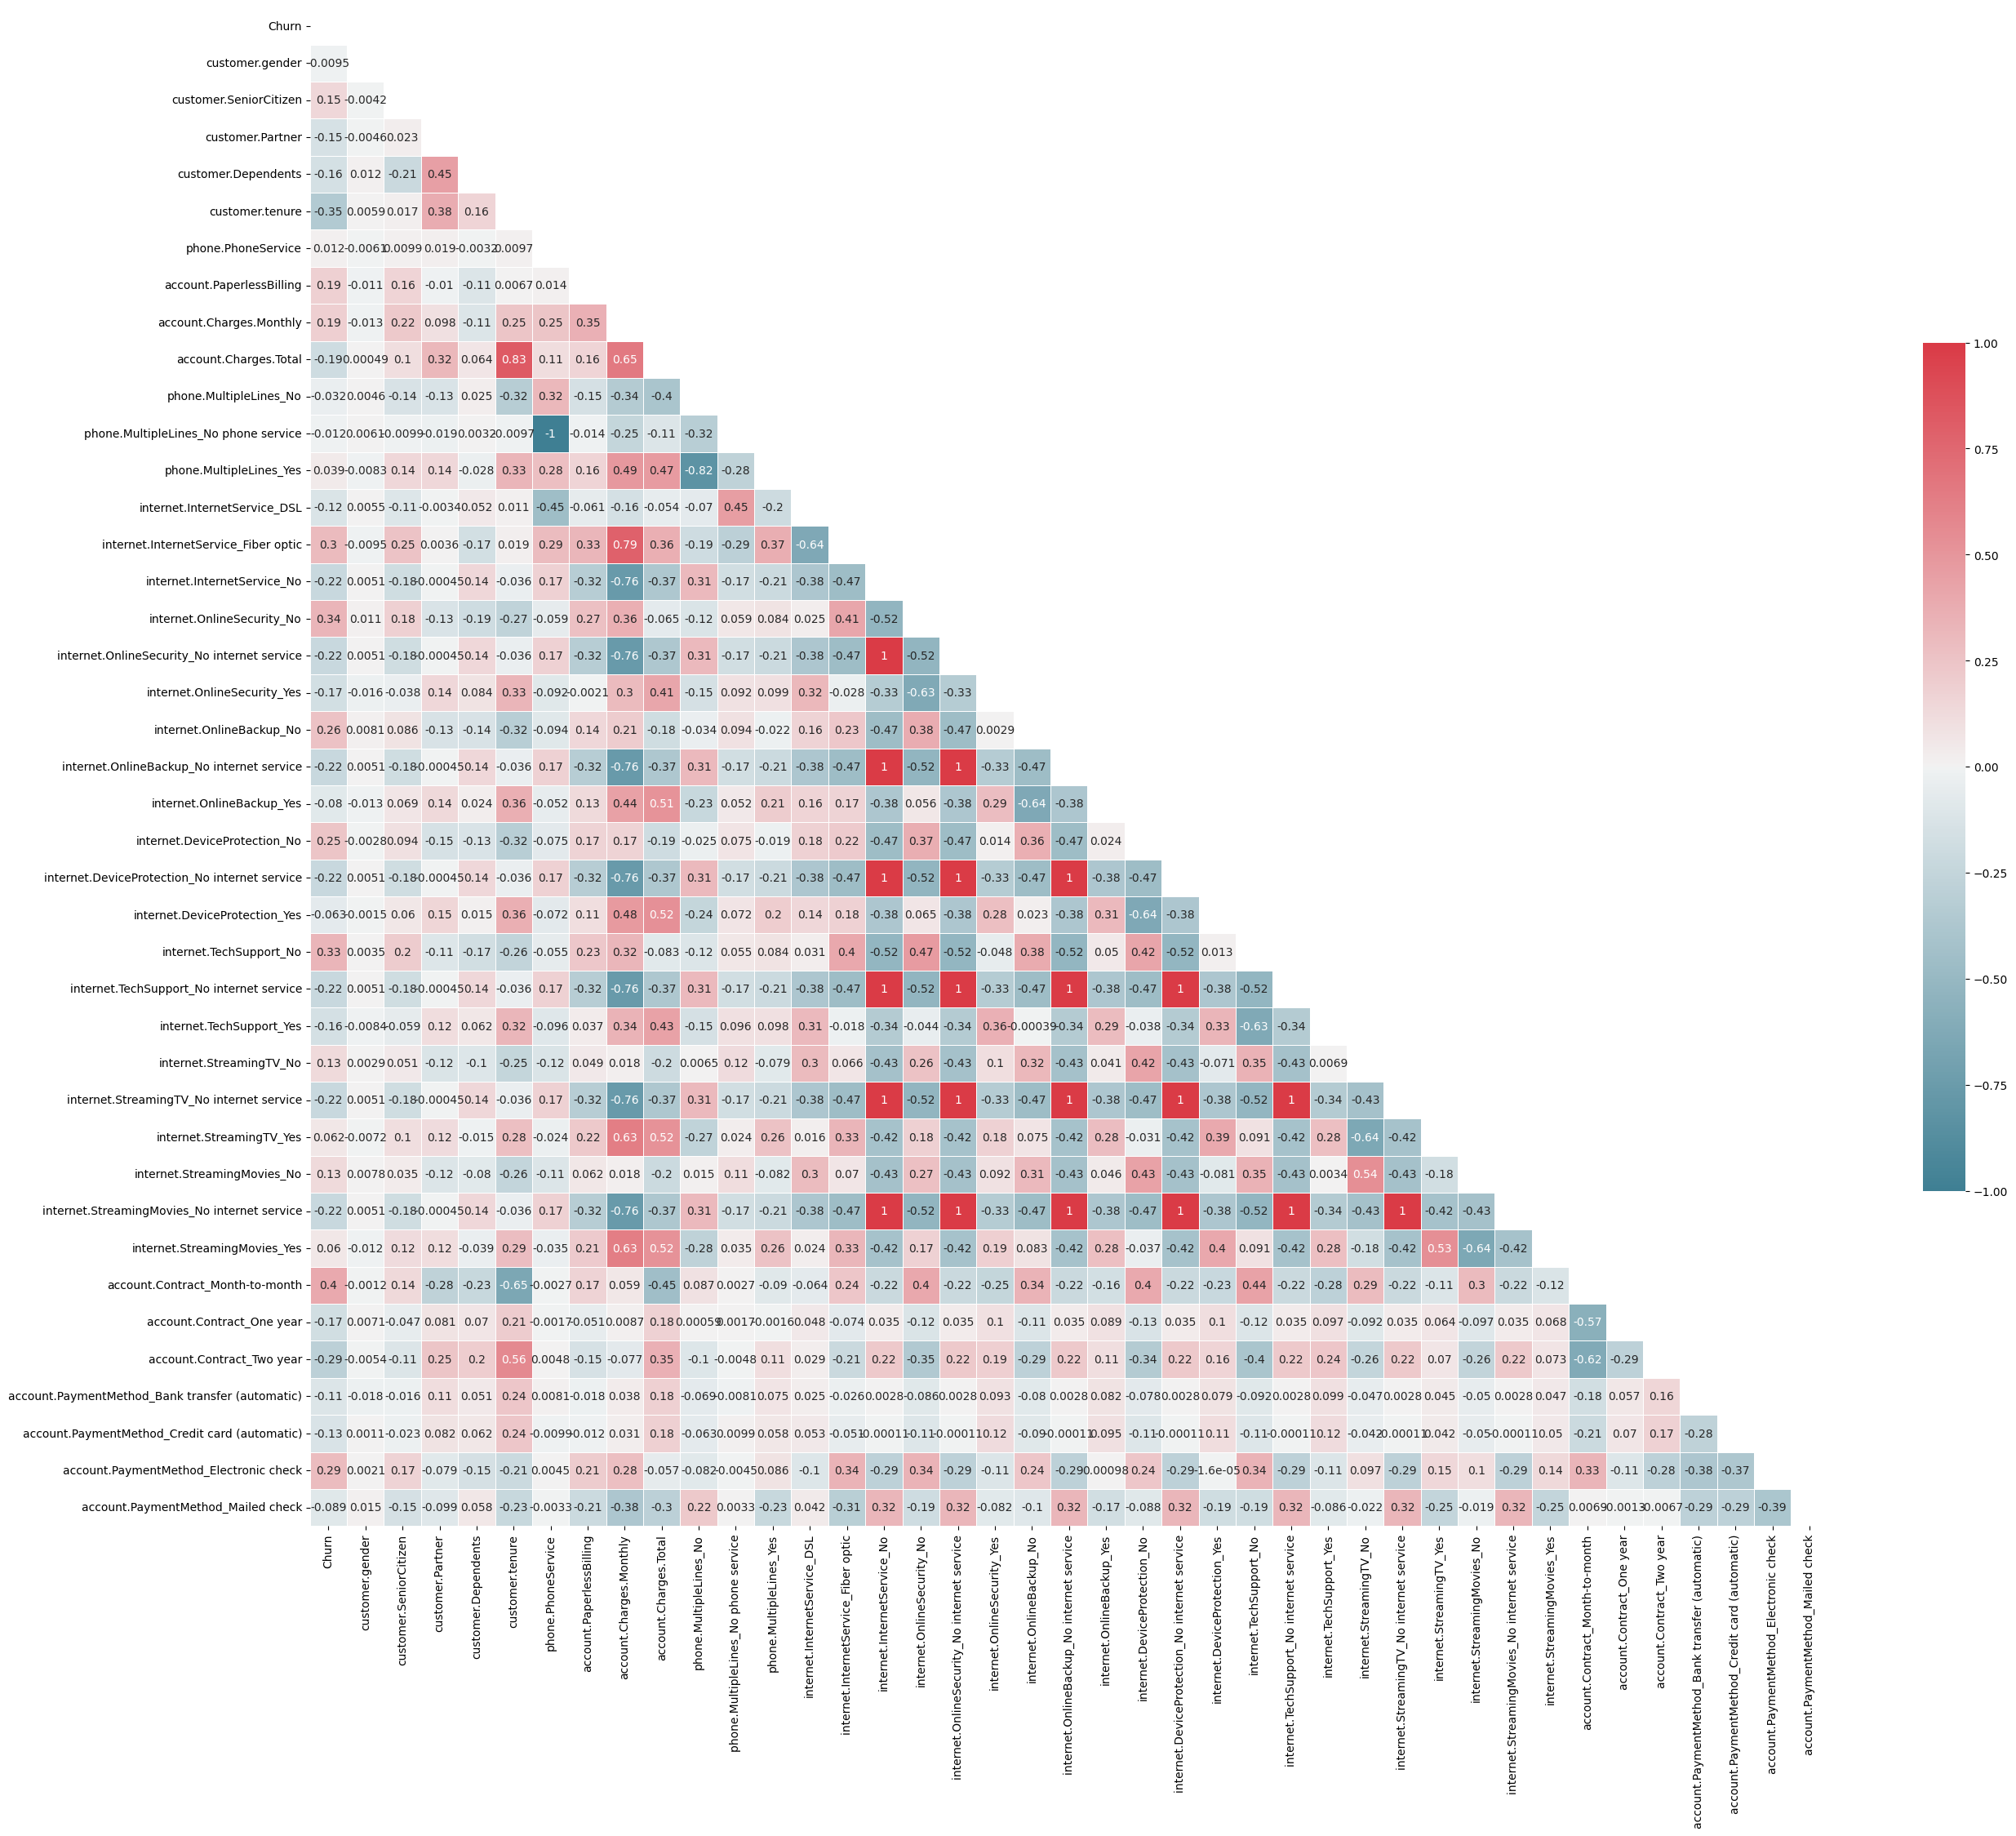

In [36]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(30, 27))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

Como tenemos una gran cantidad de variables, y muchas de ellas no tienen correelacion con la cancelación (Churn), hay que tomar las variables que tienen una correlación mayor o iugual a 0.15 con respecto a la cancelacion. Asi mismo, las variables que tienen una correlacion muy fuerte con otra variable que no sea la cancelación, muestra que se comportan igual, por lo que solo se debe de seleccionar una de ellas, ya para hacer mas ligero el modelo, ademas al tener un comportamiento similar en la variable cancelación, la prediccion con el modelo no se veria casi afectada.

In [37]:
# Obtener la matriz de correlación
corr_matriz = datos_codificados.corr(numeric_only=True)

# Calcular la correlación de todas las variables con Churn
churn_corr = corr_matriz['Churn'].abs().sort_values(ascending=False)

# Seleccionar variables con correlación significativa con Churn (≥ 0.15)
umbral_churn = 0.15
variables_corr_churn = churn_corr[churn_corr >= umbral_churn].index.tolist()
variables_corr_churn.remove('Churn')  # Quitamos la variable objetivo

# Submatriz de correlación entre esas variables
filtered_corr = datos_codificados[variables_corr_churn].corr().abs()

# Eliminar variables que se correlacionen ≥ 0.8 entre sí
umbral_mutua = 0.8
upper_triangle = np.triu(np.ones(filtered_corr.shape), k=1).astype(bool)
filtered_corr_upper = filtered_corr.where(upper_triangle)

# Lista de variables a eliminar
variables_eliminar = [column for column in filtered_corr_upper.columns 
                      if any(filtered_corr_upper[column] > umbral_mutua)]

# Variables finales seleccionadas
variables_finales_corr_churn = [var for var in variables_corr_churn if var not in variables_eliminar]

# 7. Mostrar resultados
print("✅ Variables con buena correlación con Churn:")
print(variables_corr_churn)
print("\n❌ Variables eliminadas por alta correlación mutua (redundantes):")
print(variables_eliminar)
print("\n✅ Variables finales seleccionadas para el modelo:")
print(variables_finales_corr_churn)

✅ Variables con buena correlación con Churn:
['account.Contract_Month-to-month', 'customer.tenure', 'internet.OnlineSecurity_No', 'internet.TechSupport_No', 'internet.InternetService_Fiber optic', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check', 'internet.OnlineBackup_No', 'internet.DeviceProtection_No', 'internet.StreamingMovies_No internet service', 'internet.StreamingTV_No internet service', 'internet.TechSupport_No internet service', 'internet.DeviceProtection_No internet service', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.InternetService_No', 'account.Charges.Total', 'account.Charges.Monthly', 'account.PaperlessBilling', 'account.Contract_One year', 'internet.OnlineSecurity_Yes', 'internet.TechSupport_Yes', 'customer.Dependents']

❌ Variables eliminadas por alta correlación mutua (redundantes):
['internet.StreamingTV_No internet service', 'internet.TechSupport_No internet service', 'internet.DevicePr

Ahora que ya tenemos las variables para el modelo, las mostramos en un mapa de calor, para ver las correlaciones de manera mas clara en un grafico.

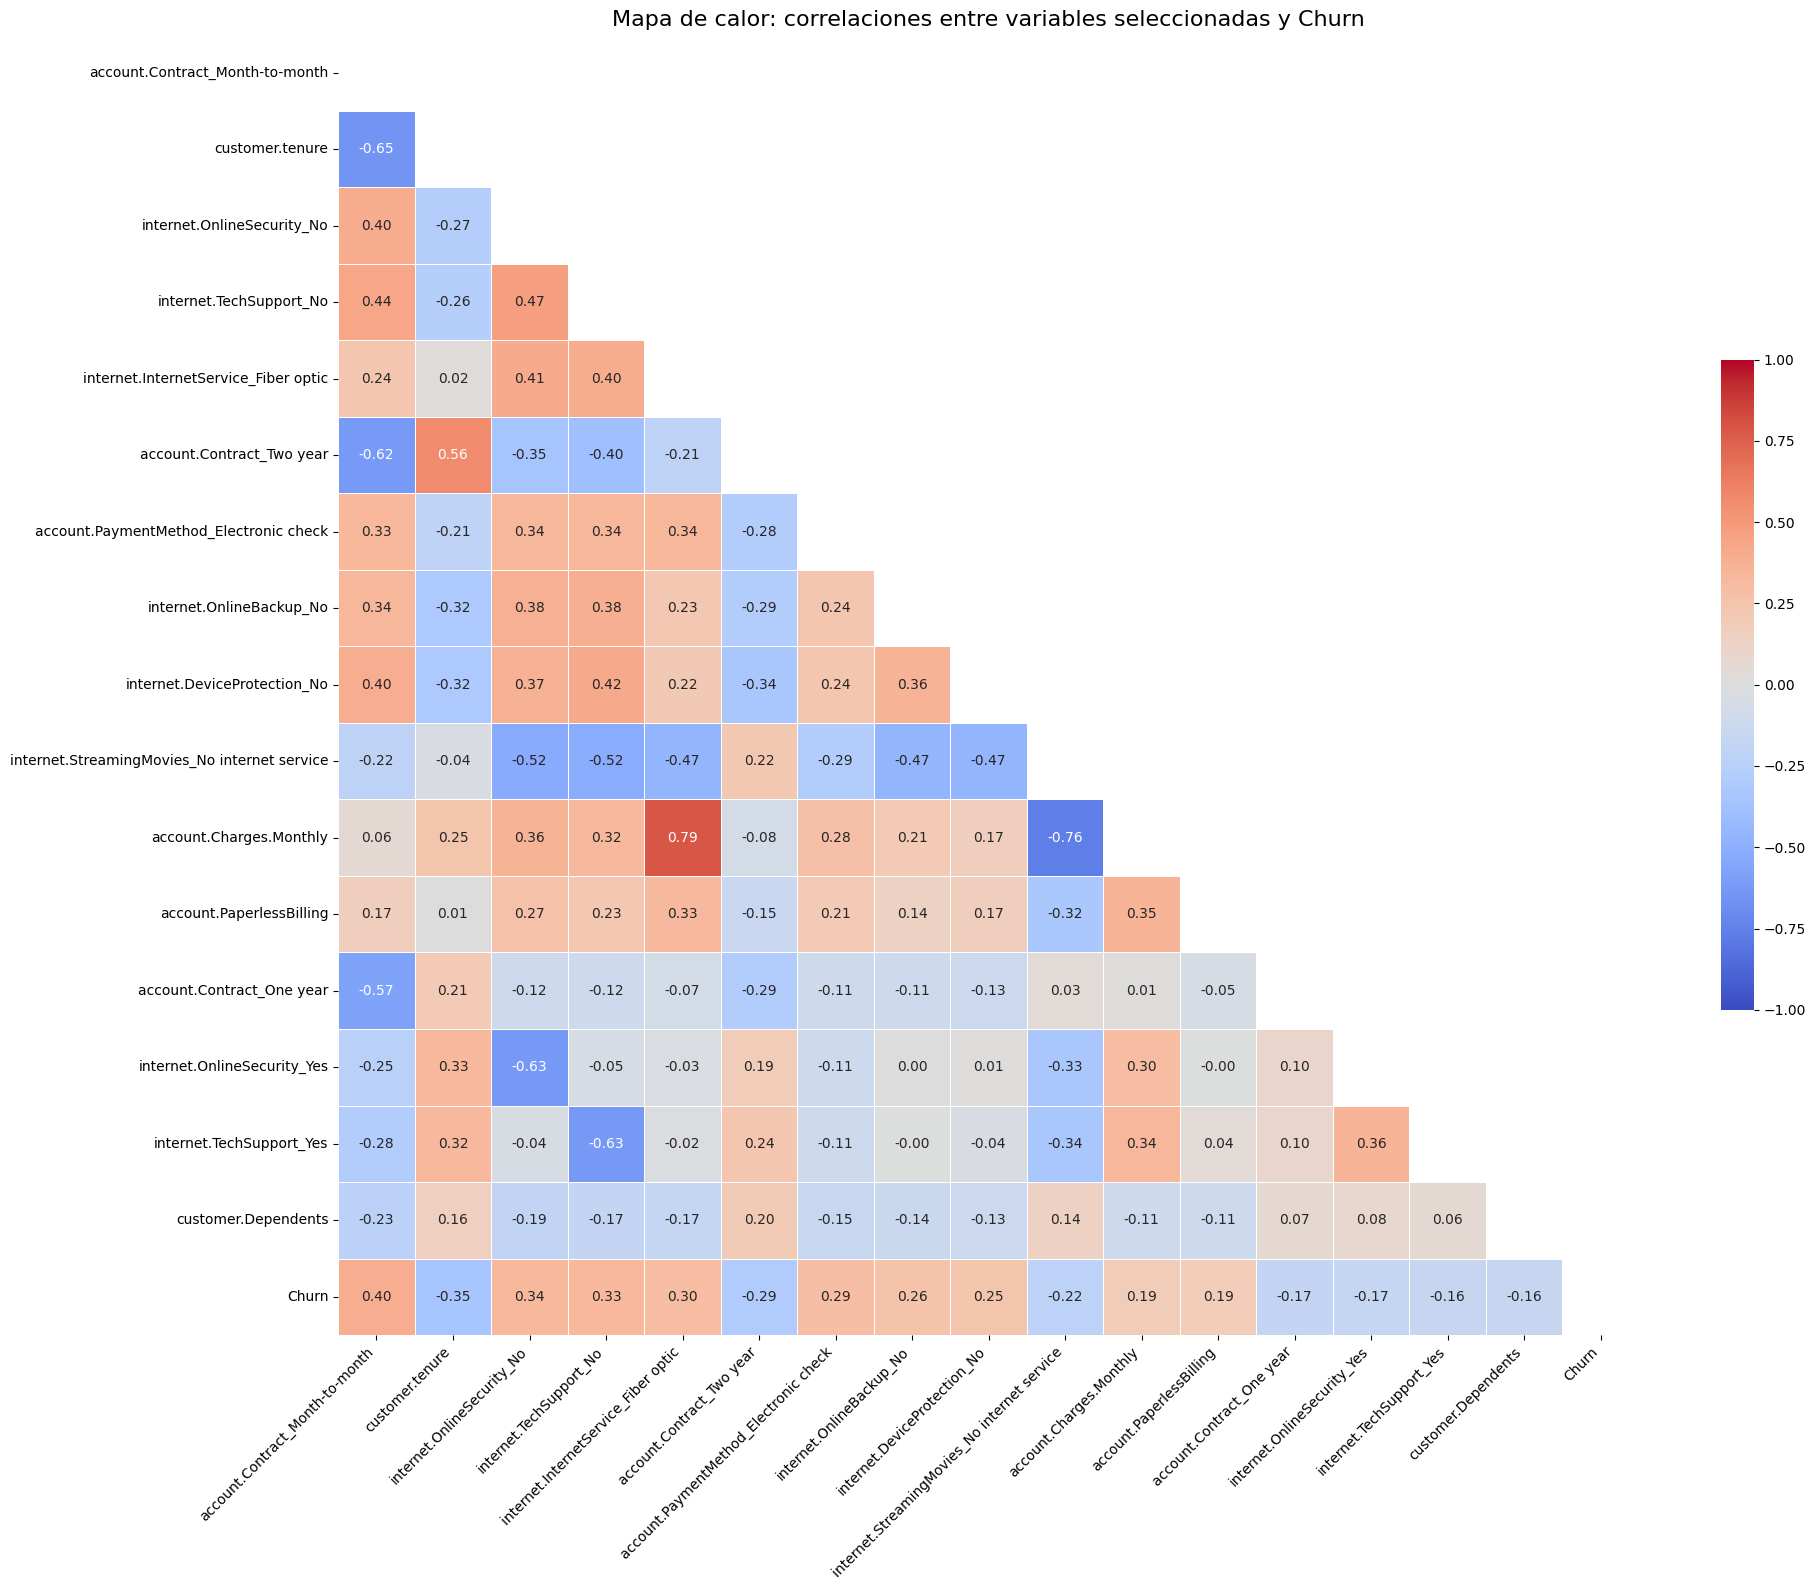

In [38]:
# Crear submatriz de correlación de las variables seleccionadas
corr = datos_codificados[variables_finales_corr_churn + ['Churn']].corr()

# Generar máscara para ocultar el triángulo superior
mascara = np.triu(np.ones_like(corr, dtype=bool))  # oculta parte superior

# Crear figura y mapa de calor
plt.figure(figsize=(20, 16))  # ajusta tamaño según número de columnas

sns.heatmap(corr,
            mask=mascara,
            cmap='coolwarm',       # colores resaltantes
            vmin=-1, vmax=1, center=0,
            square=True,
            linewidths=.5,
            annot=True,            # mostrar valores
            fmt=".2f",
            cbar_kws={"shrink": .5})

plt.title("Mapa de calor: correlaciones entre variables seleccionadas y Churn", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



### **Analisis dirigido**

Se realizó un análisis dirigido únicamente sobre las variables seleccionadas tras el filtro por correlación y multicolinealidad, para facilitar la interpretación del modelo y mantener el enfoque en los factores de mayor impacto sobre la cancelación

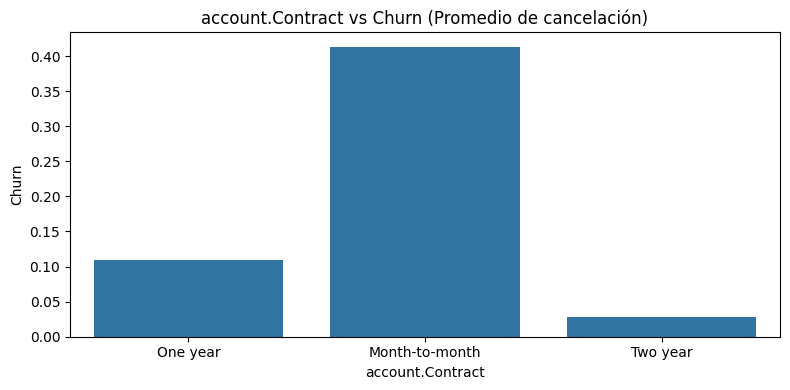

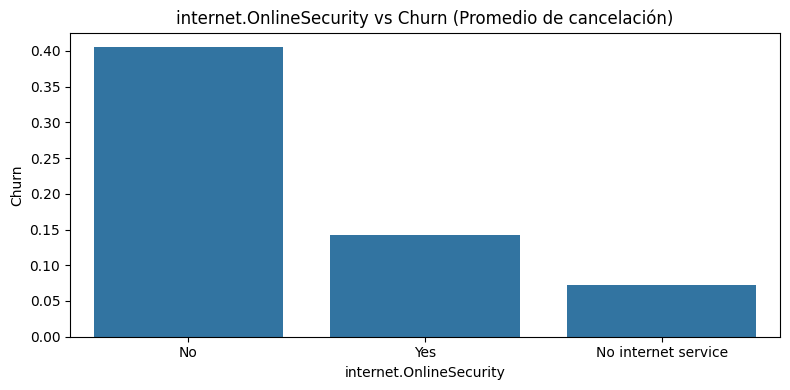

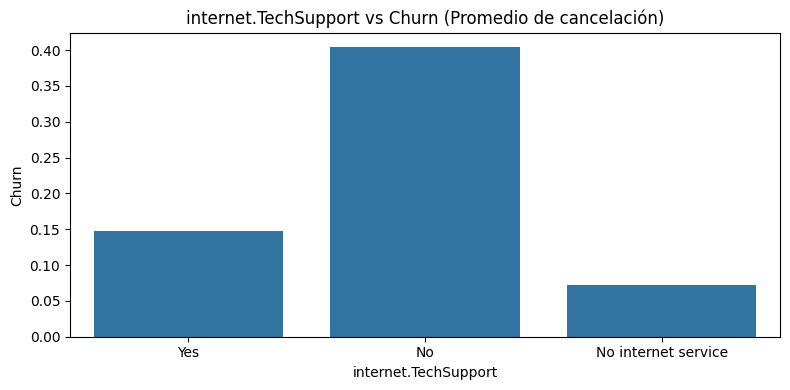

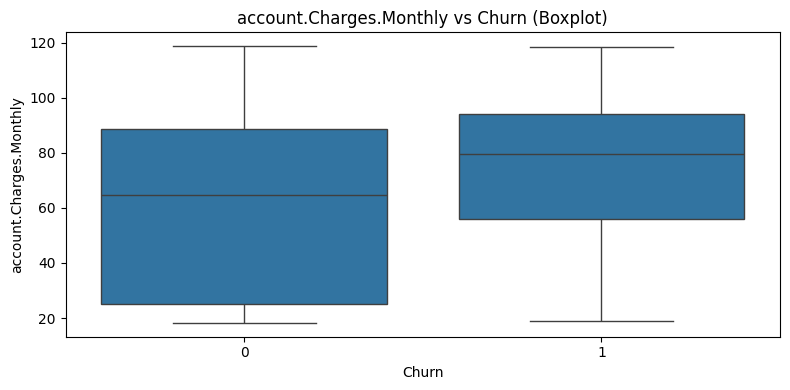

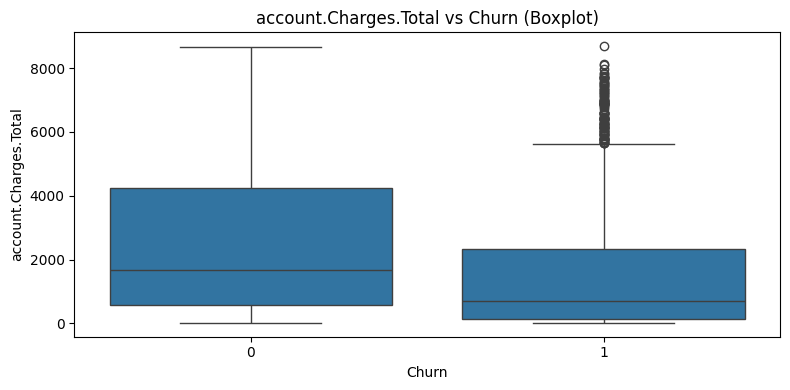

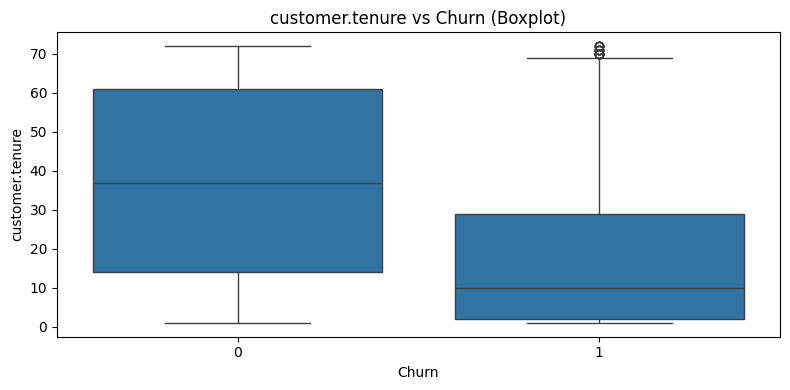

In [39]:
def graficar_variables_vs_churn(df, variables, target='Churn'):
    """
    Genera gráficos entre cada variable seleccionada y la variable objetivo (Churn).
    
    - Para variables numéricas: boxplot
    - Para variables binarias/categóricas: barplot (promedio de Churn por categoría)
    
    Parámetros:
        df: DataFrame con los datos
        variables: lista de nombres de columnas a graficar
        target: nombre de la variable objetivo (default = 'Churn')
    """
    for var in variables:
        plt.figure(figsize=(8, 4))
        if pd.api.types.is_numeric_dtype(df[var]) and df[var].nunique() > 5:
            # Si es numérica continua
            sns.boxplot(x=target, y=var, data=df)
            plt.title(f'{var} vs {target} (Boxplot)')
        else:
            # Si es binaria o categórica
            sns.barplot(x=var, y=target, data=df, errorbar=None)
            plt.title(f'{var} vs {target} (Promedio de cancelación)')
        plt.tight_layout()
        plt.show()

variables_finales = [
    'account.Contract',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'customer.tenure'
]

graficar_variables_vs_churn(datos, variables_finales, target='Churn')

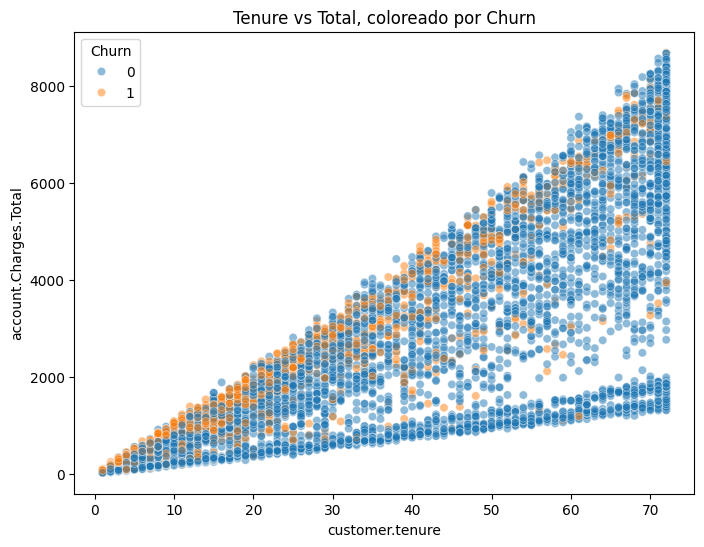

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=datos, alpha=0.5)
plt.title("Tenure vs Total, coloreado por Churn")
plt.show()

Se nos pide ver la relacion entre Tiempo de contrato × Cancelación y Gasto total × Cancelación, per vemos que estas tienen una alta correlación, por lo que solo se debe de quedar una, siendo elegida el "Tiempo de contrato", ya que tiene una mayor correlacion con la cancelación (Churn)

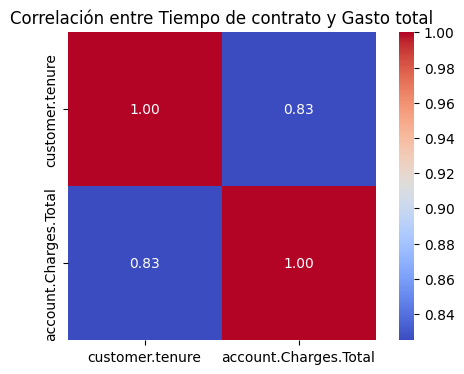

In [41]:
plt.figure(figsize=(6, 4))
corr = datos[['customer.tenure', 'account.Charges.Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlación entre Tiempo de contrato y Gasto total')
plt.show()

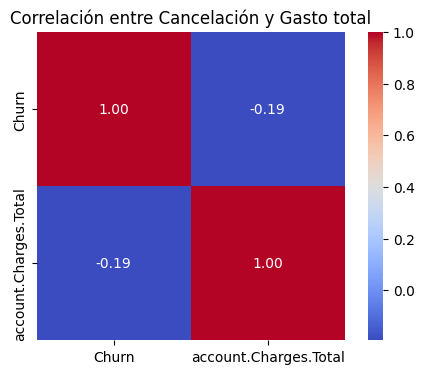

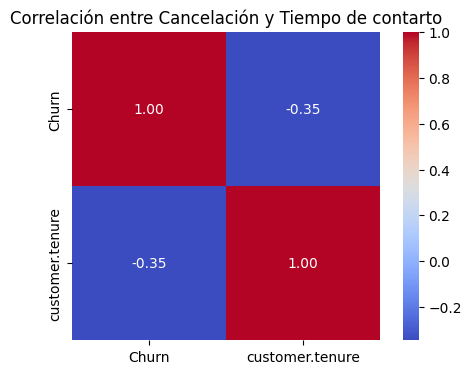

In [42]:
plt.figure(figsize=(6, 4))
corr = datos[['Churn', 'account.Charges.Total']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlación entre Cancelación y Gasto total')

plt.figure(figsize=(6, 4))
corr = datos[['Churn', 'customer.tenure']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlación entre Cancelación y Tiempo de contarto')

plt.show()

## **Separación de Datos**

Se divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.  
Pare este caso usaremos 80/20

In [43]:
X = datos_codificados[variables_finales_corr_churn]
y = datos_codificados.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

## **Balanceo de clases**

Verificación de la proporción de cancelación (Churn) afin que no haya un gran desbalance entre los datos, lo cual puede afectar al modelo

In [44]:
y.value_counts(normalize=True)

Churn
0    0.74242
1    0.25758
Name: proportion, dtype: float64

### **Balanceo oversampling**

In [45]:
# Importar biblioteca
from imblearn.over_sampling import SMOTE

In [46]:
oversampling = SMOTE(random_state=42)
X_train_bal, y_train_bal = oversampling.fit_resample(X_train, y_train)

In [47]:
y_train_bal.value_counts(normalize=True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

## **Modelos**

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_regresion(y_test, y_pred):
    rmse = mean_squared_error(y_test, y_pred, squared=False) # root mean square error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {
        'RMSE':round(rmse,4),
        'MAE':round(mae,4),
        'R2':round(r2,4)
    }
    return metricas

### **Baseline**

#### **Creacion del modelo**
Cracion de un modelo simple para tomar como base y ver la mejora de los modelos más avanzados, en este caso DummyRegressor

In [49]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

baseline = DummyClassifier()
baseline.fit(X_train,y_train)

DummyClassifier()

#### **Evaluación del modelo**

In [53]:
# Función para calcular métricas de evaluación
def calcular_clasificacion(y_t, y_p):
    return {
        'Exactitud': round(accuracy_score(y_t, y_p), 4),
        'Precisión': round(precision_score(y_t, y_p, average='weighted', zero_division=0), 4),
        'Recall': round(recall_score(y_t, y_p, average='weighted'), 4),
        'F1-score': round(f1_score(y_t, y_p, average='weighted'), 4)
    }

y_pred_baseline = cross_val_predict(baseline, X_train, y_train, cv=5)
resultados_baseline = calcular_clasificacion(y_train, y_pred_baseline)
print("Métricas en Validación Cruzada (Train):")
for k, v in resultados_baseline.items():
    print(f"{k}: {v}")

# Entrenamiento
baseline.fit(X_train, y_train)
# Validacion
y_pred_test = baseline.predict(X_test)
result_y_pred_test = calcular_clasificacion(y_test, y_pred_test)
print("\nMétricas de evaluación final (test):")
for k, v in result_y_pred_test.items():
    print(f"{k}: {v}")

Métricas en Validación Cruzada (Train):
Exactitud: 0.7424
Precisión: 0.5512
Recall: 0.7424
F1-score: 0.6327

Métricas de evaluación final (test):
Exactitud: 0.7424
Precisión: 0.5512
Recall: 0.7424
F1-score: 0.6327


### **Matriz de confusión**

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1078
           1       0.00      0.00      0.00       374

    accuracy                           0.74      1452
   macro avg       0.37      0.50      0.43      1452
weighted avg       0.55      0.74      0.63      1452



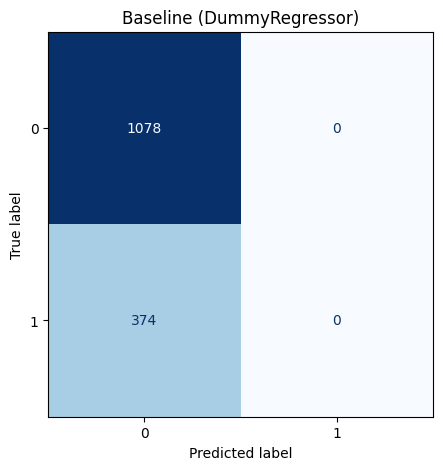

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Reporte de clasificación
print(classification_report(y_test, y_pred_test, zero_division=0))
# Matriz de confusión
cm_baseline = confusion_matrix(y_test, y_pred_test)
# Mostrar la matriz
fig, ax = plt.subplots(figsize=(6, 5))  # tamaño ajustable
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, display_labels=[0, 1])
disp.plot(cmap='Blues', colorbar=False, ax=ax)  # <- aquí usamos ax
ax.set_title('Baseline (DummyRegressor)')
plt.show()


### **Decision Tree Classifier**

#### **Creacion del modelo**

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Función para calcular métricas de evaluación
def calcular_clasificacion(y_tst, y_prd):
    return {
        'Exactitud': round(accuracy_score(y_tst, y_prd), 4),
        'Precisión': round(precision_score(y_tst, y_prd, average='weighted'), 4),
        'Recall': round(recall_score(y_tst, y_prd, average='weighted'), 4),
        'F1-score': round(f1_score(y_tst, y_prd, average='weighted'), 4)
    }

# Configuración validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Estimación del modelo
modelo_tree_nobal = DecisionTreeClassifier(random_state=42)
y_pred_cv_no_bal = cross_val_predict(modelo_tree_nobal, X_train, y_train, cv=skf)
result_y_pred_cv_no_bal = calcular_clasificacion(y_train, y_pred_cv_no_bal)

print("Métricas en Validación Cruzada (Train):")
for k, v in result_y_pred_cv_no_bal.items():
    print(f"{k}: {v}")

# Entrenamiento
modelo_tree_nobal.fit(X_train, y_train)
# Validacion
y_pred_test_no_bal = modelo_tree_nobal.predict(X_test)
result_y_pred_test_no_bal = calcular_clasificacion(y_test, y_pred_test_no_bal)
print("\nMétricas de evaluación final (test):")
for k, v in result_y_pred_test_no_bal.items():
    print(f"{k}: {v}")

Métricas en Validación Cruzada (Train):
Exactitud: 0.7347
Precisión: 0.7342
Recall: 0.7347
F1-score: 0.7344

Métricas de evaluación final (test):
Exactitud: 0.728
Precisión: 0.7249
Recall: 0.728
F1-score: 0.7264


#### **Modelo balanceado (oversampling)**

In [ ]:
# Estimación del modelo
modelo_tree_bal = DecisionTreeClassifier(random_state=42)
y_pred_cv_bal = cross_val_predict(modelo_tree_bal, X_train_bal, y_train_bal, cv=skf)
result_y_pred_cv_bal = calcular_clasificacion(y_train_bal, y_pred_cv_bal)

print("Métricas en Validación Cruzada (Train):")
for k, v in result_y_pred_cv_bal.items():
    print(f"{k}: {v}")

# Entrenamiento
modelo_tree_bal.fit(X_train_bal, y_train_bal)
# Validacion
y_pred_test_bal = modelo_tree_bal.predict(X_test)
result_y_pred_test_bal = calcular_clasificacion(y_test, y_pred_test_bal)
print("\nMétricas de evaluación final (test):")
for k, v in result_y_pred_test_bal.items():
    print(f"{k}: {v}")

Métricas en Validación Cruzada (Train):
Exactitud: 0.811
Precisión: 0.811
Recall: 0.811
F1-score: 0.811

Métricas de evaluación final (test):
Exactitud: 0.7245
Precisión: 0.7324
Recall: 0.7245
F1-score: 0.7281


#### **Mejores parametros**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid de hiperparámetros
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12, None]}

# -------------------------
# Escenario 1: Sin balancear
# -------------------------
modelo_no_bal = DecisionTreeClassifier(random_state=42)
grid_no_bal = GridSearchCV(modelo_no_bal, param_grid, cv=skf, scoring='f1_weighted')
grid_no_bal.fit(X_train, y_train)

print("=== Sin balancear ===")
print("Mejor profundidad:", grid_no_bal.best_params_['max_depth'])
print("Mejor F1 CV:", round(grid_no_bal.best_score_, 4))

# Evaluación en test
y_pred_test_no_bal = grid_no_bal.best_estimator_.predict(X_test)
metricas_test_no_bal = calcular_clasificacion(y_test, y_pred_test_no_bal)
print("Métricas Test:", metricas_test_no_bal)

# -------------------------
# Escenario 2: Con balanceo (SMOTE)
# -------------------------
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

modelo_bal = DecisionTreeClassifier(random_state=42)
grid_bal = GridSearchCV(modelo_bal, param_grid, cv=skf, scoring='f1_weighted')
grid_bal.fit(X_train_bal, y_train_bal)

print("\n=== Balanceado ===")
print("Mejor profundidad:", grid_bal.best_params_['max_depth'])
print("Mejor F1 CV:", round(grid_bal.best_score_, 4))

# Evaluación en test (datos originales)
y_pred_test_bal = grid_bal.best_estimator_.predict(X_test)
metricas_test_bal = calcular_clasificacion(y_test, y_pred_test_bal)
print("Métricas Test:", metricas_test_bal)

# -------------------------
# Comparación final
# -------------------------
print("\n=== Comparación Test Final ===")
print("Sin balancear:", metricas_test_no_bal)
print("Balanceado :", metricas_test_bal)


=== Sin balancear ===
Mejor profundidad: 5
Mejor F1 CV: 0.7801
Métricas Test: {'Exactitud': 0.7817, 'Precisión': 0.7745, 'Recall': 0.7817, 'F1-score': 0.7774}

=== Balanceado ===
Mejor profundidad: 11
Mejor F1 CV: 0.8173
Métricas Test: {'Exactitud': 0.728, 'Precisión': 0.7624, 'Recall': 0.728, 'F1-score': 0.7394}

=== Comparación Test Final ===
Sin balancear: {'Exactitud': 0.7817, 'Precisión': 0.7745, 'Recall': 0.7817, 'F1-score': 0.7774}
Balanceado : {'Exactitud': 0.728, 'Precisión': 0.7624, 'Recall': 0.728, 'F1-score': 0.7394}


#### **Matriz de confusión**

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1078
           1       0.59      0.52      0.55       374

    accuracy                           0.78      1452
   macro avg       0.71      0.70      0.70      1452
weighted avg       0.77      0.78      0.78      1452

              precision    recall  f1-score   support

           0       0.86      0.76      0.80      1078
           1       0.48      0.65      0.55       374

    accuracy                           0.73      1452
   macro avg       0.67      0.70      0.68      1452
weighted avg       0.76      0.73      0.74      1452



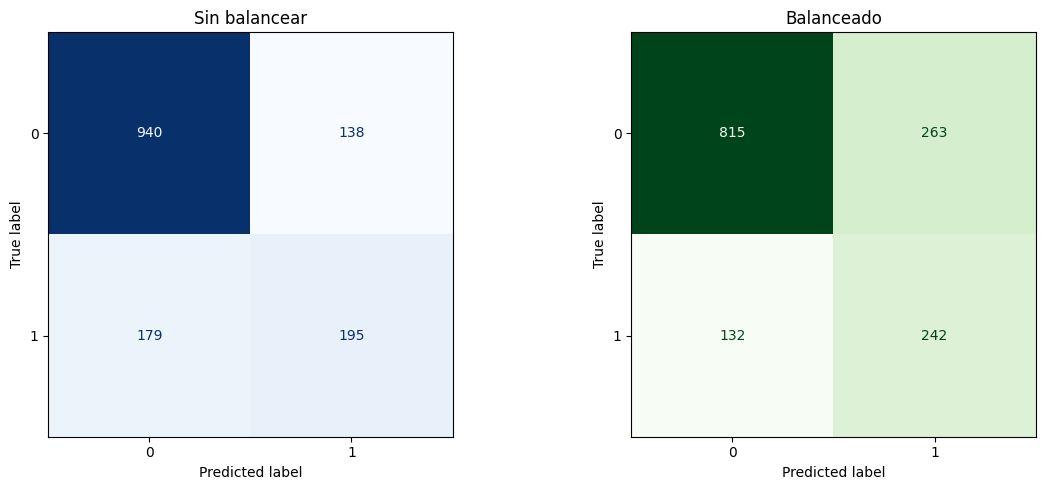

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Matrices de confusión
print(classification_report(y_test,y_pred_test_no_bal))
print(classification_report(y_test,y_pred_test_bal))
cm_no_bal = confusion_matrix(y_test, y_pred_test_no_bal)
cm_bal = confusion_matrix(y_test, y_pred_test_bal)

# Mostrar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

disp_no_bal = ConfusionMatrixDisplay(confusion_matrix=cm_no_bal, display_labels=[0,1])
disp_no_bal.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Sin balancear')

disp_bal = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=[0,1])
disp_bal.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Balanceado')

plt.tight_layout()
plt.show()

### **RandomForest**

#### **Creación del modelo**

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Función para calcular métricas de evaluación
def calcular_clasificacion(y_tst, y_prd):
    return {
        'Exactitud': round(accuracy_score(y_tst, y_prd), 4),
        'Precisión': round(precision_score(y_tst, y_prd, average='weighted'), 4),
        'Recall': round(recall_score(y_tst, y_prd, average='weighted'), 4),
        'F1-score': round(f1_score(y_tst, y_prd, average='weighted'), 4)
    }

# Configuración validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Estimación del modelo
modelo_forest_nobal = RandomForestClassifier(random_state=42)
y_pred_cv_no_bal = cross_val_predict(modelo_forest_nobal, X_train, y_train, cv=skf)
result_y_pred_cv_no_bal = calcular_clasificacion(y_train, y_pred_cv_no_bal)

print("Métricas en Validación Cruzada (Train):")
for k, v in result_y_pred_cv_no_bal.items():
    print(f"{k}: {v}")

# Entrenamiento
modelo_forest_nobal.fit(X_train, y_train)
# Validacion
y_pred_test_no_bal = modelo_forest_nobal.predict(X_test)
result_y_pred_test_no_bal = calcular_clasificacion(y_test, y_pred_test_no_bal)
print("\nMétricas de evaluación final (test):")
for k, v in result_y_pred_test_no_bal.items():
    print(f"{k}: {v}")

Métricas en Validación Cruzada (Train):
Exactitud: 0.7748
Precisión: 0.7605
Recall: 0.7748
F1-score: 0.7645

Métricas de evaluación final (test):
Exactitud: 0.7693
Precisión: 0.7569
Recall: 0.7693
F1-score: 0.7611


#### **Modelo balanceado (oversampling)**

In [ ]:
# Estimación del modelo balanceado
modelo_forest_bal = RandomForestClassifier(random_state=42)
y_pred_cv_bal = cross_val_predict(modelo_forest_bal, X_train_bal, y_train_bal, cv=skf)
result_y_pred_cv_bal = calcular_clasificacion(y_train_bal, y_pred_cv_bal)

print("Métricas en Validación Cruzada (Train):")
for k, v in result_y_pred_cv_bal.items():
    print(f"{k}: {v}")

# Entrenamiento
modelo_forest_bal.fit(X_train_bal, y_train_bal)
# Validacion
y_pred_test_bal = modelo_forest_bal.predict(X_test)
result_y_pred_test_bal = calcular_clasificacion(y_test, y_pred_test_bal)
print("\nMétricas de evaluación final (test):")
for k, v in result_y_pred_test_bal.items():
    print(f"{k}: {v}")

Métricas en Validación Cruzada (Train):
Exactitud: 0.8428
Precisión: 0.8428
Recall: 0.8428
F1-score: 0.8428

Métricas de evaluación final (test):
Exactitud: 0.7638
Precisión: 0.7657
Recall: 0.7638
F1-score: 0.7647


#### **Mejores parametros**

In [121]:
from sklearn.model_selection import GridSearchCV

# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],  # número de árboles
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# -------------------------
# Escenario 1: Sin balancear
# -------------------------
modelo_no_bal = RandomForestClassifier(random_state=42)
grid_no_bal = GridSearchCV(modelo_no_bal, param_grid, cv=skf, scoring='f1_weighted')
grid_no_bal.fit(X_train, y_train)

print("=== Sin balancear ===")
print("Mejor profundidad:", grid_no_bal.best_params_)

# Evaluación en test
y_pred_test_no_bal = grid_no_bal.best_estimator_.predict(X_test)
metricas_test_no_bal = calcular_clasificacion(y_test, y_pred_test_no_bal)
print("Métricas Test:", metricas_test_no_bal)

# -------------------------
# Escenario 2: Con balanceo (SMOTE)
# -------------------------
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

modelo_bal = RandomForestClassifier(random_state=42)
grid_bal = GridSearchCV(modelo_bal, param_grid, cv=skf, scoring='f1_weighted')
grid_bal.fit(X_train_bal, y_train_bal)

print("\n=== Balanceado ===")
print("Mejor profundidad:", grid_bal.best_params_)

# Evaluación en test (datos originales)
y_pred_test_bal = grid_bal.best_estimator_.predict(X_test)
metricas_test_bal = calcular_clasificacion(y_test, y_pred_test_bal)
print("Métricas Test:", metricas_test_bal)

# -------------------------
# Comparación final
# -------------------------
print("\n=== Comparación Test Final ===")
print("Sin balancear:", metricas_test_no_bal)
print("Balanceado :", metricas_test_bal)

=== Sin balancear ===
Mejor profundidad: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Métricas Test: {'Exactitud': 0.8037, 'Precisión': 0.7929, 'Recall': 0.8037, 'F1-score': 0.7951}

=== Balanceado ===
Mejor profundidad: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Métricas Test: {'Exactitud': 0.7755, 'Precisión': 0.7852, 'Recall': 0.7755, 'F1-score': 0.7795}

=== Comparación Test Final ===
Sin balancear: {'Exactitud': 0.8037, 'Precisión': 0.7929, 'Recall': 0.8037, 'F1-score': 0.7951}
Balanceado : {'Exactitud': 0.7755, 'Precisión': 0.7852, 'Recall': 0.7755, 'F1-score': 0.7795}


#### **Matriz de confusión**

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1078
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1452
   macro avg       0.75      0.71      0.72      1452
weighted avg       0.79      0.80      0.80      1452

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1078
           1       0.56      0.63      0.59       374

    accuracy                           0.78      1452
   macro avg       0.71      0.73      0.72      1452
weighted avg       0.79      0.78      0.78      1452



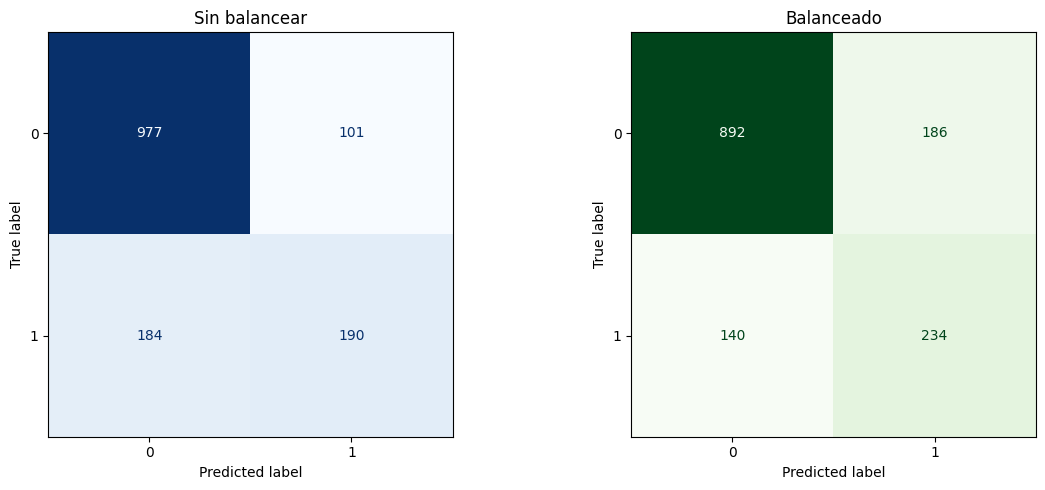

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Matrices de confusión
print(classification_report(y_test,y_pred_test_no_bal))
print(classification_report(y_test,y_pred_test_bal))
cm_no_bal = confusion_matrix(y_test, y_pred_test_no_bal)
cm_bal = confusion_matrix(y_test, y_pred_test_bal)

# Mostrar lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,5))

disp_no_bal = ConfusionMatrixDisplay(confusion_matrix=cm_no_bal, display_labels=[0,1])
disp_no_bal.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Sin balancear')

disp_bal = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=[0,1])
disp_bal.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Balanceado')

plt.tight_layout()
plt.show()

# **📄 Informe de predicción de abandono**
## 🎯 **Misión**

La nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  
La empresa TelecomX quiere anticiparse al problema de la cancelación, por lo que se pretende construir un pipeline robusto para esta etapa inicial de modelado.

## 🧠 **Objetivos del Desafío**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).
- Realizar análisis de correlación y selección de variables.
- Entrenar dos o más modelos de clasificación.
- Evaluar el rendimiento de los modelos con métricas.
- Interpretar los resultados, incluyendo la importancia de las variables.
- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## **Principales Factores que Influyen en la Cancelación**
Con base en el análisis de correlaciones y coeficientes, se identificaron los siguientes factores como más influyentes en el abandono de clientes:
### 🔺**Factores que aumentan la probalilidad del abandono del servicio**

|Variable|Correlacion|
|--------|-----------|
|Contrato mes a mes|+0.40|
|No contratar con seguridad en línea adicional|+0.34|
|No contartar con soporte técnico adicional|+0.33|
|No contar con fibra optica en su servicio de internet|+0.30|
|Tener como metodo de pago cheque electronico|+0.30|
|No con contar con sevicio de respaldo en línea|+0.26|
|No contar con servicio de protección del dispositivo|+0.25|
|El monto de pago mes a mes|+0.19|

### 🟢**Factores que disminuyen la probalilidad del abandono del servicio**

|Variable|Correlacion|
|--------|-----------|
|Contrato mes a mes|+0.40|
|Mayor timpo del contrato|-0.35|
|Contrato a dos años|-0.29|
|Sin servicio de streaming de peliculas|-0.22|
|Contrato a un año|-0.17|

## **Conclusión sobre los factores que aumentan o disminuyen el abandono der servicio**

Se puede observar que cuando los clientes contratan el sevicio de internet, aquellos con un contarto de pago mes a mes tiene una mayor posibilidad de abandonar comparados con quienes tienen un contarto a uno o dos años. Sin embargo en el analisis se puede ver que la gran mayoria de los clientes tienen un contrato mes a mes, por lo cual se consideraria tartar de que contarten un sevicio de uno o dos años, si este fuera el unico parametro a tomar.  

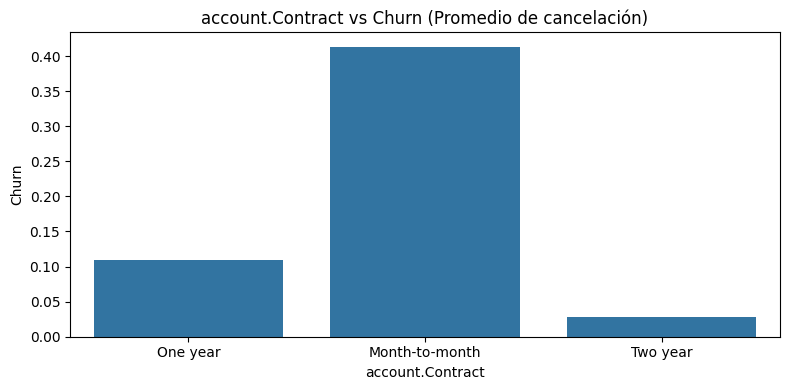

Por otra parte, no contar con servicios adicionales al de internet o telefonia, tales como seguridad en linea, soporte tecnico adicional, respaldo en lnea y protecion de dispocitivos, pueden aumentar el abandono del servicio. Puesto que tiene menor compromiso con el servicio, o estos sistemas tiene una ventaja respecto a los competidores, ya sea en calidad o precio (sd recomienda hacer una analisis respecto a la competencia).  
Sin embargo el no contar con servicios de streaming para ver peliculas, aumenta la retencion de los clientes, tal ves porque el servicio es mas caro que con otros provedores (se recomienda hacer un analisis de este servicio respecto a la competencia)

Asi mismo podemos ver que las personas que permanecen con el servicio, son las que mantiene un cargo mensula menor, puesto que esto tien que ver con la economia de los cliente, pues buscan mejores ofertas.    

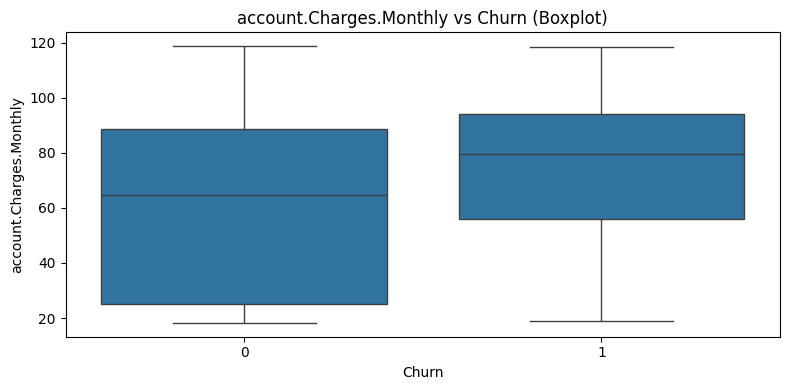  

Sin embargo podemos ver que entre mas tiempo tiene las personas con el servicio, son mas leales a la compañia. Se puede ver que poco mas de las personas que dejan el servicio lo hacen antes del rpimer año, lo cual se relaciona con la variable de contrato mesual en lugar de anual o de dos años.

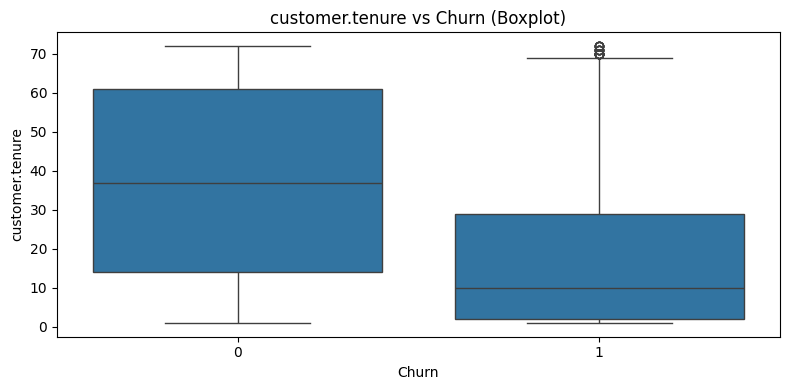

## **Resultados de los Modelos de Machine Learning**

### **Comparacion de resultados generales**
Los resultados generales de cada modelo de Machine Learning utilizado son los siguientes:

**Baseline (DummyRegresor)**
|Metrica|Valor|
|-------|-----|
|Exactitud| 0.7424|
|Precisión| 0.5512|
|Recall| 0.7424|
|F1-score| 0.6327|

**DecisionTreeClassifier**
|Metrica|Valor|
|-------|-----|
|Exactitud|0.7817|
|Precisión|0.7745|
|Recall|0.7817|
|F1-score|0.7774|

**DecisionTreeClassifier balanceado**
|Metrica|Valor|
|-------|-----|
|Exactitud|0.728|
|Precisión|0.7624
|Recall|0.728|
|F1-score|0.7394|

**RandomForestClassifier**
|Metrica|Valor|
|-------|-----|
|Exactitud|0.8037|
|Precisión|0.7929|
|Recall|0.8037|
|F1-score|0.7951|

**RandomForestClassifier balanceado**
|Metrica|Valor|
|-------|-----|
|Exactitud|0.7755|
|Precisión|0.7852|
|Recall|0.7755|
|F1-score|0.7795|

### **Informe del modelo ML Baseline (DummyRegressor)**
Se utilizo el modelo mas basico de clasificación para poder ver el comportamiento, y lograr ver si con modelos mas complejos habia un aumento significativo en la presición.  
En este se puede ver que tiene un proimedio de:
- Exactitud: 0.7424
- Precisión: 0.5512
- Recall: 0.7424
- F1-score: 0.6327

Con esto se pudiera pensar que el modelo DummyRegressor tienen una presicion muy alta, sin embargo al observar mas detenidamente en la matriza de comfusión podemos observar que solo generaliza los resultados con mayor probabilidad de que sucedan. Como la opción de que los clientes no abandonen el servicio es la cantidad con mayor probabilidad, este modelo apunta a este resultado en todos los casos.

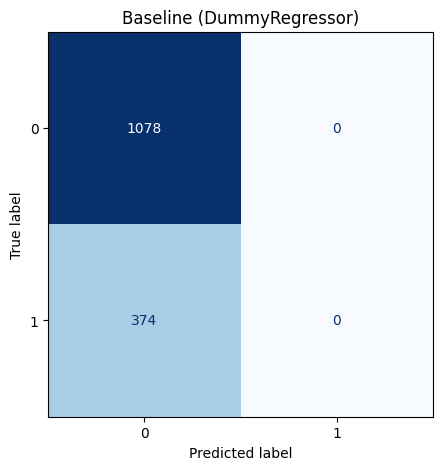

Deacuerdo con la cantidad de clientes que permanecen y clientes que abandonan, corresponde con la exactitud general del model, que es de 0.7424:
|Churn|Valor en decimales|
|-----|-----------|
|Permanecen|0.74242|
|Abandonan|0.25758|

### **Informe del modelo DecisionTreeClassifier**
**DecisionTreeClassifier sin balancear**
- Exactitud:0.7817
- Precisión: 0.7745
- Recall: 0.7817
- F1-score: 0.7774

**DecisionTreeClassifier balanceado**
- Exactitud: 0.728
- Precisión: 0.7624
- Recall: 0.728
- F1-score: 0.7394

En este podemos ver que el arbol de desicion con una profundida optima de 5 y los datos sin balancear, tiene un mejor desempeño general en comparacion a el arbol de desición con los datos balanceados y la profundidad optima de 11, el cual nos da una presicion de 0.7817.  
Comparando las matrices de confusión de los dos modelos, podemos ver al tener los datos no balanceados tiene mas acierto en los clientes que se quedan en el servicio, pero la presicion en identificar los clientes que verdaderamente abandonan el servicio es menor. Asi mismo, tiene una gran cantidad de falsos negativos (clientes clasificados como que peemanecen, pero abandonan el servicio).  
Con respecto al modelo con datos balanceados, se acierta mas en los clientes que pueden abandonar el servicio, pero se sacrifica presicion en los clientes que permanecen. Asi mismo, nos da una gran cantidad de falsos positivos (clasificados como clientes que dejan el servicio, pero permanecen), siendo mayores que los verdaderos positivos (clientes que abandonan).
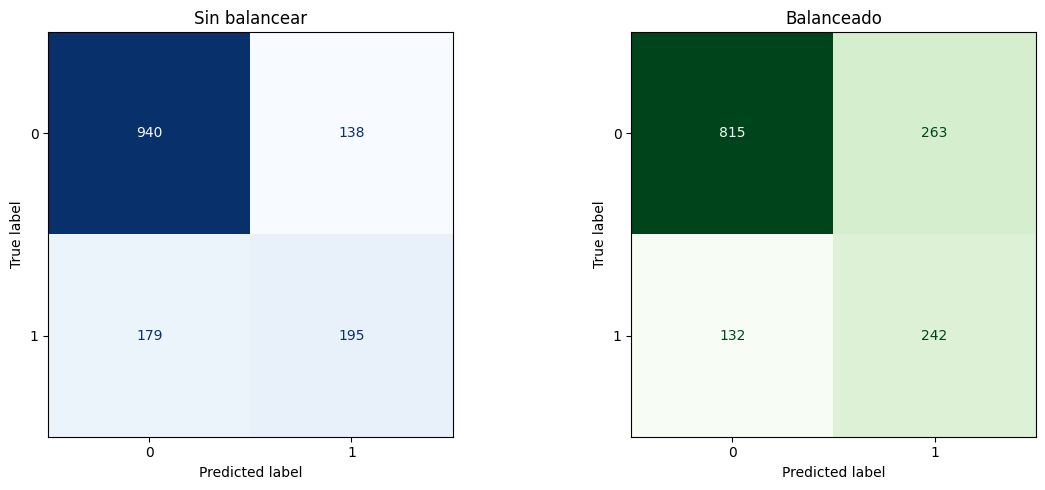

### **Informe del modelo RandomForestClassifier**
Para este modelo podemos ver que predice mejor el comportamiento de los clientes en comparacion con el uso de un solo arbol de desicion, sin embargo hay que evaluar si es mejor usar datos balanceados o no, y los parametros optimos.
**RandomForestClassifier con datos sin balancear**
- Exactitud: 0.8037
- Precisión: 0.7929
- Recall: 0.8037
- F1-score: 0.7951

**RandomForestClassifier con datos balanceado**
- Exactitud: 0.7755
- Precisión: 0.7852
- Recall: 0.7755
- F1-score: 0.7795

En este podemos ver que el modelo clasificador RandomForest con los mejores paratros contando con un total de 200 arboles, lo cuales cuentan con una profundida optima de 10 y los datos sin balancear, tiene un mejor desempeño general en comparacion con el mismo modelo optimizado con 300 arboles, sin profundidad maxima y los datos balanceados. Puesto que el acierto del modelo es de 80.37% contra el 77.55%.   
Sin embargo, comparando las matrices de confusión de los dos modelos, podemos ver al tener los datos no balanceados tiene mas acierto en los clientes que se quedan en el servicio, pero la presicion en identificar los clientes que verdaderamente abandonan el servicio es menor. Asi mismo, tiene una gran cantidad de falsos negativos (clientes que peemanecen, pero son clasificados como que abandonaran el servicio).  
Con respecto al modelo con datos balanceados, se acierta mas en los clientes que pueden abandonar el servicio, pero se sacrifica presicion en los clientes que permanecen. Asi mismo, aumentan un poco los falsos positivos (clasificados como clientes que dejan el servicio, pero permanecen), pero se reducen los falsos negativos (clientes identificados como que permanecen pero abandonan el servicio).

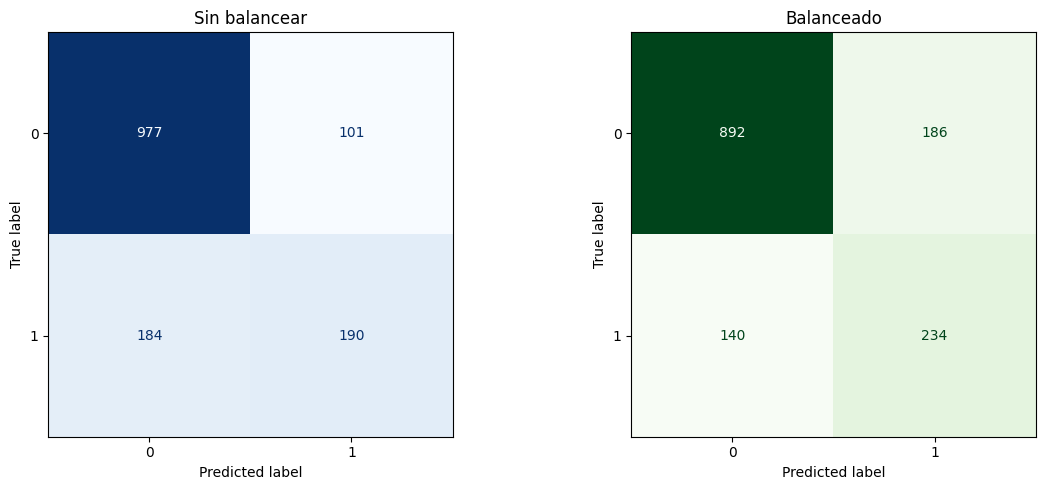

## **Seleccion del modelo**

Debido a que el objetivo es encontrar un modelo capas de predecir que personas son propensas a elegir abandonar el servicio, las opciones a elegir son el uso de datos balanceados, puesto que esto aciertan en mayor medida en esta metrica.  
Sin embargo, debemos tomar en cuenta que el modelo del arbol de desicion, nos da una mayor cantidad de aciertos en clientes que dejan el servicio, tambien muestra una mayor cantidad de falsos positivos (clientes clasificados potenciales a abandonar cuando no lo hacen), comparados con el modelo RandomForest. En cambio en falsos negativos, es decir clientes clsificados como que se mantienen pero deciden irse, no hay mucha diferencia entre modelos.  
Por lo que en general el modelo RandomForest tiene una mayor exactitud a la hora de decidir si un cliete puede abandonar el servicio, sin cometer tantos errores de clasificación. Tal cual se muestra en la matriz de confusión y en los resultados generales.
| Metrica   | DesicionTree | RandomForest |
|-----------|--------------|--------------|
| Exactitud |    0.728     |    0.7755    |
| Precisión |    0.7624    |    0.7852    |
| Recall    |    0.728     |    0.7755    |
| F1-score  |    0.7394    |    0.7795    |

Para una mejor elección del modelo, se deben de tomar en cuenta las medidas a implementar cuando se identifiquen los clientes propensos a abandonar el servicio.

## **Acciones a tomar en cuenta una vez identificados los clientes propensos a abandonar**